In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

In [267]:
# Access the information fo the website =(all the objects)
growth = requests.get('https://www.em.com.br/app/noticia/economia/2019/02/19/internas_economia,1031885/faturamento-do-e-commerce-soma-r-53-2-bilhoes-em-2018-alta-de-12.shtml')

# Using the beautifulsoup method to get just the information readable 
soup = bs(growth.content, 'html.parser')

In [268]:
# Using the method to get all the info classified as <p>
text_sector = soup.find_all('p')[9].get_text()

In [269]:
# Extracting the info(basically numbers) from the text html
number1 = tt[79:83].replace(",",".")
number2 = tt[417:422].replace(",",".")

In [270]:
# Create empty lists to populate it and then create a DF
list_year=[]
list_fa=[]
list_growth=[]

# Populate it 
list_year.append(tt[152:156])
list_year.append(tt[52:56])
list_year.append(tt[351:355])
list_fa.append(float(number1)/((float(tt[130:132])+100)/100))
list_fa.append(number1)
list_fa.append(number2)
list_growth.append("-")
list_growth.append(tt[130:132])
list_growth.append(tt[388:390])

In [271]:
# Create the DF
sector_df = pd.DataFrame(list(zip(list_year,list_fa,list_growth)),columns =['Year', 'Revenue(Billions R$)', 'Growth(%)'])
sector_df.set_index('Year',inplace=True)
print(sector_df)

     Revenue(Billions R$) Growth(%)
Year                               
2017                 47.5         -
2018                 53.2        12
2019                61.2         15


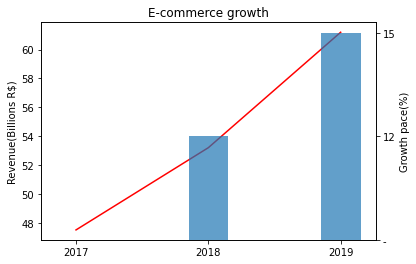

In [272]:
# Applying the method to make possible to plot two info at the same chart 
fig, ax1 = plt.subplots()

# PLotting the chart 6 which is the Revenue of the sector throught the years 
ax1.plot(sector_df.index,sector_df["Revenue(Billions R$)"],color="red")

# Same process as the chart 5
ax1.set_ylabel("Revenue(Billions R$)")
ax2=ax1.twinx()
ax2.bar(sector_df.index,sector_df["Growth(%)"],width=0.3,alpha=0.7)
ax2.grid(False)
ax2.set_ylabel("Growth pace(%)")
ax2.set_xlabel("Years")
plt.title("E-commerce growth")
plt.show()